# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge (mouse_metadata,study_results,how="right", on="Mouse ID")
# Display the data table for preview
print (data)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        b128    Capomulin  Female           9          22          0   
1        f932     Ketapril    Male          15          29          0   
2        g107     Ketapril  Female           2          29          0   
3        a457     Ketapril  Female          11          30          0   
4        c819     Ketapril    Male          21          25          0   
...       ...          ...     ...         ...         ...        ...   
1888     r944    Capomulin    Male          12          25         45   
1889     u364    Capomulin    Male          18          17         45   
1890     p438     Ceftamin  Female          11          26         45   
1891     x773      Placebo  Female          21          30         45   
1892     b879     Stelasyn  Female           4          26         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              45.000000         

In [3]:
# Checking the number of mice.
 #pd.read_csv("mouse_metadata_path")
#num_mice = data['Mousedata ID'].unique()
#num_mice
len (data["Mouse ID"].unique())


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = data[data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

print(duplicates)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
107      g989     Propriva  Female          21          26          0   
137      g989     Propriva  Female          21          26          0   
329      g989     Propriva  Female          21          26          5   
360      g989     Propriva  Female          21          26          5   
620      g989     Propriva  Female          21          26         10   
681      g989     Propriva  Female          21          26         10   
815      g989     Propriva  Female          21          26         15   
869      g989     Propriva  Female          21          26         15   
950      g989     Propriva  Female          21          26         20   
1111     g989     Propriva  Female          21          26         20   

      Tumor Volume (mm3)  Metastatic Sites  
107            45.000000                 0  
137            45.000000                 0  
329            48.786801                 0  
360            4

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data = data[data['Mouse ID'].isin(duplicates['Mouse ID'])]

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data.drop_duplicates(subset='Mouse ID', keep='first')
print (clean_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       b128    Capomulin  Female           9          22          0   
1       f932     Ketapril    Male          15          29          0   
2       g107     Ketapril  Female           2          29          0   
3       a457     Ketapril  Female          11          30          0   
4       c819     Ketapril    Male          21          25          0   
..       ...          ...     ...         ...         ...        ...   
245     t565    Capomulin  Female          20          17          0   
246     i557    Capomulin  Female           1          24          0   
247     m957    Capomulin  Female           3          19          0   
248     f966    Capomulin    Male          16          17          0   
249     m601    Capomulin    Male          22          17          0   

     Tumor Volume (mm3)  Metastatic Sites  
0                  45.0                 0  
1                  45.0                 0  
2  

In [7]:
# Checking the number of mice in the clean DataFrame.
number_of_mice =clean_data['Mouse ID'].nunique()
print(f'The number of mice in the clean DataFrame is: {number_of_mice}')


The number of mice in the clean DataFrame is: 249


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
#groupby and summary methods

drug_group = data.groupby(["Drug Regimen"])
#drug_stats = drug_group.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
drug_stats_mean = drug_group.mean()["Tumor Volume (mm3)"]
drug_stats_median = drug_group.median()["Tumor Volume (mm3)"]
drug_stats_var = drug_group.var()["Tumor Volume (mm3)"]
drug_stats_Std = drug_group.std()["Tumor Volume (mm3)"]
drug_stats_Sem = drug_group.sem()["Tumor Volume (mm3)"]

# #drug_stats = drug_stats.reset_index()
# print(drug_stats_mean)
# print(drug_stats_median)
# print(drug_stats_var)
# print(drug_stats_Std)
# print(drug_stats_Sem)
summary_df = pd.DataFrame({
    "Mean Tumor Volume": drug_stats_mean,
    "Median Tumor Volume": drug_stats_median,
    "Tumor Volume Variance": drug_stats_var ,
    "Tumor Volume Std. Dev.": drug_stats_Std,
    "Tumor Volume Std. Err.": drug_stats_Sem,
})
print (summary_df)


              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


## Bar and Pie Charts

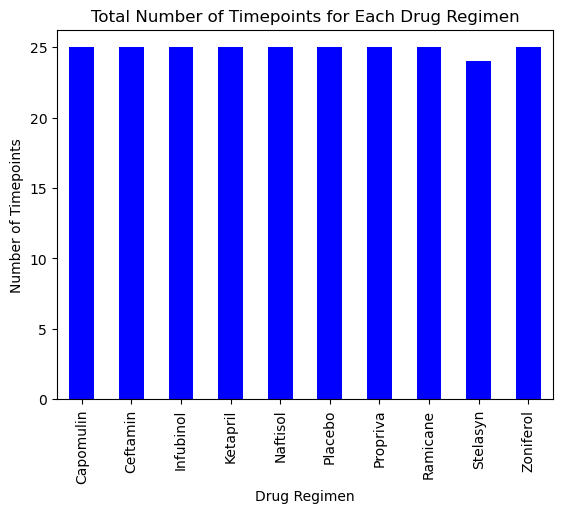

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
import matplotlib.pyplot as plt

# group data by drug regimen and count number of timepoints
timepoints = clean_data.groupby('Drug Regimen')['Timepoint'].count()

# create bar plot
timepoints.plot(kind='bar', color='b')

# set chart title and axis labels
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

# display plot
plt.show()



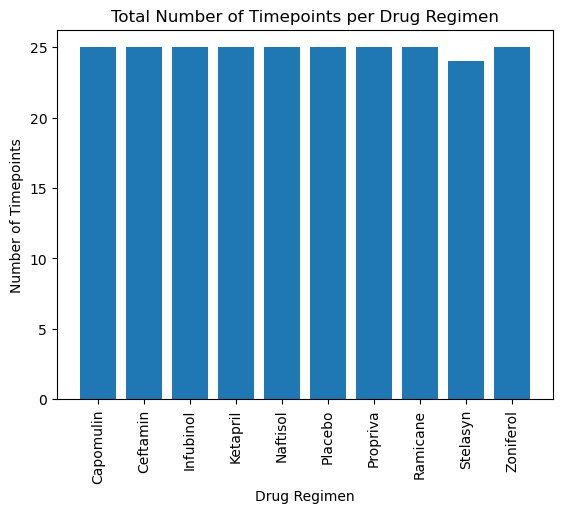

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

import matplotlib.pyplot as plt

# Group by drug regimen and count number of timepoints
timepoint_counts = clean_data.groupby('Drug Regimen')['Timepoint'].count()

# Create a bar plot
plt.bar(timepoint_counts.index, timepoint_counts.values)

# Set chart title and axis labels
plt.title('Total Number of Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()

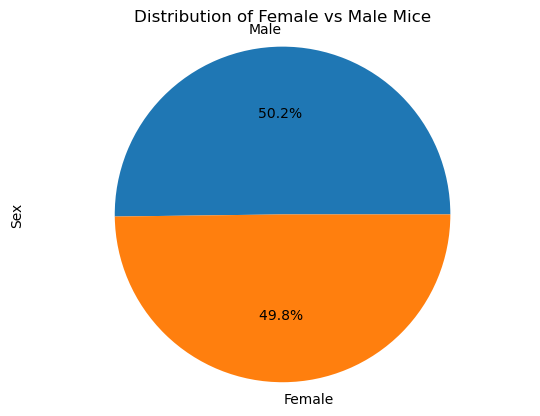

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

import matplotlib.pyplot as plt

# Create the data
gender_count = clean_data['Sex'].value_counts()
gender_count.plot (kind="pie", autopct='%1.1f%% ')
# Create the pie chart
#plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
# Add title and axis labels
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')

# Show the chart
plt.show()

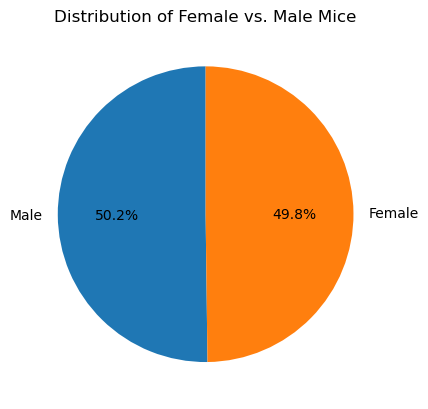

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

import matplotlib.pyplot as plt

# Get the count of male and female mice
gender_counts = mouse_metadata["Sex"].value_counts()

# Create a list of labels and values
labels = gender_counts.index.tolist()
sizes = gender_counts.tolist()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Distribution of Female vs. Male Mice")

# Show the chart
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Create a list of the four treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data to only include these four treatment regimens
final_tumor_volume_df = clean_data[clean_data['Drug Regimen'].isin(treatment_regimens)]

# Group the data by Mouse ID and find the last (greatest) timepoint for each mouse
last_timepoint_df = final_tumor_volume_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the last_timepoint_df with the original dataframe to get the tumor volume at the last timepoint for each mouse
merged_df = last_timepoint_df.merge(final_tumor_volume_df, on=['Mouse ID', 'Timepoint'], how='left')[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]


In [63]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
 # add subset 
    
    #loop of treatment list 
from scipy.stats import iqr

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
vol_list = []

for treatment in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = merged_df[merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    vol_list.append(final_volume)
    
    # Calculate the IQR
    quartiles = final_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr_val = iqr(final_volume)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr_val
    upper_bound = upperq + 1.5 * iqr_val
    outliers = final_volume.loc[(final_volume < lower_bound) | (final_volume > upper_bound)]
    
    print(f"{treatment}: {outliers}")  

Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

import matplotlib.pyplot as plt
Drug_Regimen=[ 10, 20, 30, 40, 50, 60, 70, 80]
# Create a list of the tumor volume data for each drug regimen
data = [capomulin_data['Tumor Volume'],
        ramicane_data['Tumor Volume'],
        infubinol_data['Tumor Volume'],
        ceftamin_data['Tumor Volume']]

# Create a boxplot of the tumor volume data for each drug regimen
fig, ax = plt.subplots()
ax.boxplot(data)

# Set the title and labels for the plot
ax.set_title('Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume')

# Set the tick labels for the x-axis
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# Show the plot
plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
import pandas as pd
import matplotlib.pyplot as plt

# Load data into a pandas dataframe
data = pd.read_csv("data.csv")

# Filter the dataframe to only include data for mice treated with Capomulin
capomulin_data = data[data["Drug Regimen"] == "Capomulin"]

# Choose a specific mouse to plot
selected_mouse = "mouse_id_123"

# Create a new dataframe with only data for the selected mouse
selected_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == selected_mouse]

# Create a line plot of tumor volume vs. time point
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title(f"Tumor Volume Over Time for Mouse {selected_mouse} Treated with Capomulin")
plt.show()


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

import pandas as pd
import matplotlib.pyplot as plt

# Load data into a pandas dataframe
data = pd.read_csv("data.csv")

# Filter the dataframe to only include data for mice treated with Capomulin
capomulin_data = data[data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume and mouse weight for each mouse
mouse_stats = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})

# Create a scatter plot of average tumor volume vs. mouse weight
plt.scatter(mouse_stats["Weight (g)"], mouse_stats["Tumor Volume (mm3)"])
mouse_weight =(14,16,18,20,22,24,26)
plt.xlabel("Mouse Weight (g)")
average_Tumor_Volume=("30,34,38,42,46,50")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.show()



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Load data into a pandas dataframe
data = pd.read_csv("data.csv")

# Filter the dataframe to only include data for mice treated with Capomulin
capomulin_data = data[data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume and mouse weight for each mouse
mouse_stats = capomulin_data.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})

# Calculate the correlation coefficient between mouse weight and average tumor volume
corr_coef, _ = pearsonr(mouse_stats["Weight (g)"], mouse_stats["Tumor Volume (mm3)"])
print("Correlation Coefficient:", corr_coef)

# Create a linear regression model and fit it to the data
reg_model = LinearRegression()
reg_model.fit(mouse_stats[["Weight (g)"]], mouse_stats["Tumor Volume (mm3)"])

# Print the slope and y-intercept of the regression line
print("Slope:", reg_model.coef_[0])
print("Intercept:", reg_model.intercept_)

# Create a scatter plot of average tumor volume vs. mouse weight, with the regression line overlaid
plt.scatter(mouse_stats["Weight (g)"], mouse_stats["Tumor Volume (mm3)"])
plt.plot(mouse_stats["Weight (g)"], reg_model.predict(mouse_stats[["Weight (g)"]]), color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
plt.show()